In [ ]:
pip install gradio langchain_openai pinecone

In [ ]:
!pip install torch transformers sentence-transformers datasets
!pip install keybert pymupdf pinecone-client pdfplumber
!pip install langchain langgraph langchain_community langchain_pinecone langchain_huggingface

!pip uninstall numpy
!pip install numpy==1.25.0

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.11/dist-packages/numpy-1.26.4.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 95.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-community 0.3.20 requires numpy<3,>=1.26.2, but you have numpy 1.25.0 which is incompatible.
langchain-tests 0.3.16 requires numpy<3,>=1.26.2, but you have numpy 1.25.0 which is incomp

In [ ]:
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_text_splitters import TokenTextSplitter
from langchain.text_splitter import RecursiveCharacterTextSplitter
import pdfplumber
from uuid import uuid4
from langchain_core.documents import Document
from langchain_huggingface import HuggingFaceEmbeddings
from keybert import KeyBERT
import re
import pymupdf
import datetime
from pinecone import Pinecone
from pinecone import Pinecone, ServerlessSpec
from langchain_pinecone import PineconeVectorStore
import os
import openai
import json
from langchain_openai import ChatOpenAI,OpenAI
from langgraph.graph import StateGraph,MessagesState
from typing import List, Optional
from langchain.prompts import ChatPromptTemplate,SystemMessagePromptTemplate,AIMessagePromptTemplate,HumanMessagePromptTemplate
from pydantic import BaseModel, Field
from langchain.output_parsers import PydanticOutputParser
from langgraph.graph import StateGraph, START, END
import re




In [ ]:
import os

os.environ["SERPAPI_API_KEY"] = <SERPAPI_API_KEY>
os.environ['PINECONE_API_KEY'] = <PINECONE_API_KEY>

serpapi_key = os.getenv("SERPAPI_API_KEY")
pinecone_api_key = os.getenv("PINECONE_API_KEY")

In [ ]:
from pinecone import Pinecone, ServerlessSpec

pinecone_api_key = os.getenv("PINECONE_API_KEY")

pc = Pinecone(api_key=pinecone_api_key)
pc.create_index(
    name="profilestore",
    dimension=768 , # Replace with your model dimensions
    metric="cosine", # Replace with your model metric
    spec=ServerlessSpec(
        cloud="aws",
        region="us-east-1"
    )
)

In [ ]:
from huggingface_hub import login

token = <HUGGING FACE TOKEN>
login(token=token, add_to_git_credential=True)  # ADD YOUR TOKEN HERE

In [ ]:
pc= Pinecone(api_key= pinecone_api_key)
index = pc.Index("profilestore")
embedding_model = HuggingFaceEmbeddings(model_name = 'hshashank06/final-regulatory-policy')
vector_store = PineconeVectorStore(index=index, embedding= embedding_model)
key_model = KeyBERT();

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
os.environ["OPENAI_API_KEY"] = <OPENAI_API_KEY>
openai.api_key = os.getenv("OPENAI_API_KEY")

In [ ]:

text = """GENERAL INSTRUCTIONS .................................................................................................................................................. 5
WHO MUST REPORT ................................................................................................................................................................................ 5
WHERE TO SUBMIT THE REPORTS ............................................................................................................................................................ 6
WHEN TO SUBMIT THE REPORTS .............................................................................................................................................................. 7
HOW TO PREPARE THE REPORTS: ............................................................................................................................................................ 8
Schedule A – Retail ............................................................................................................................................................ 12
A.1 – INTERNATIONAL AUTO LOAN ........................................................................................................................................................ 12
A.2 – US AUTO LOAN ............................................................................................................................................................................ 17
A.3 – INTERNATIONAL CREDIT CARD ..................................................................................................................................................... 23
A.4 – INTERNATIONAL HOME EQUITY .................................................................................................................................................... 27
A.5 – INTERNATIONAL FIRST LIEN MORTGAGE ...................................................................................................................................... 31
A.6 – INTERNATIONAL OTHER CONSUMER SCHEDULE ............................................................................................................................ 35
A.7 – US OTHER CONSUMER ................................................................................................................................................................. 38
A.8 – INTERNATIONAL SMALL BUSINESS ................................................................................................................................................ 41
A.9 – US SMALL BUSINESS..................................................................................................................................................................... 45
A.10 – STUDENT LOAN ......................................................................................................................................................................... 48
Schedule B—Securities .................................................................................................................................................... 52
B.1—SECURITIES 1 (“MAIN SCHEDULE”) .............................................................................................................................................. 52
B.2—SECURITIES 2 (“INVESTMENT SECURITIES WITH DESIGNATED ACCOUNTING HEDGES”) .................................................................. 57
Schedule C—Regulatory Capital Instruments ............................................................................................................. 61
C.1—REGULATORY CAPITAL AND SUBORDINATED DEBT INSTRUMENTS AS OF QUARTER END ................................................................ 61
C.2—REGULATORY CAPITAL AND SUBORDINATED DEBT INSTRUMENT REPURCHASES/REDEMPTIONS DURING QUARTER ....................... 63
C.3 – REGULATORY CAPITAL AND SUBORDINATED DEBT INSTRUMENTS ISSUANCES DURING QUARTER ................................................... 65
Schedule D—Regulatory Capital .................................................................................................................................... 69
Schedule E—Operational Risk ........................................................................................................................................ 74
E.1—OPERATIONAL LOSS HISTORY ....................................................................................................................................................... 74
E.2.  INTERNAL BUSINESS LINE .............................................................................................................................................................. 80
E.3.  UNIT-OF-MEASURE (UOM) ........................................................................................................................................................... 81
E.4.  THRESHOLD INFORMATION ............................................................................................................................................................ 82
E.5—LEGAL RESERVES FREQUENCY ....................................................................................................................................................... 83
Schedule F—Trading ........................................................................................................................................................ 86
GLOSSARY ............................................................................................................................................................................................. 89
REGIONAL GROUPINGS .......................................................................................................................................................................... 91
F.1—EQUITY BY GEOGRAPHY ............................................................................................................................................................... 93
F.2—EQUITY SPOT-VOL GRID .............................................................................................................................................................. 94
F.3—OTHER EQUITY ............................................................................................................................................................................ 95
F.4—FX SPOT SENSITIVITIES ................................................................................................................................................................ 96
F.5—FX VEGA ...................................................................................................................................................................................... 97
F.6—RATES DV01 ............................................................................................................................................................................... 98
F.7—RATES VEGA .............................................................................................................................................................................. 101
F.8—OTHER RATES ............................................................................................................................................................................ 102
F.9—ENERGY ..................................................................................................................................................................................... 103
F.10—METALS .................................................................................................................................................................................. 104
F.11—AGS & SOFTS ........................................................................................................................................................................... 105
F.12—COMMODITY INDICES ............................................................................................................................................................... 106

F.13—COMMODITY SPOT-VOL GRIDS ................................................................................................................................................. 107
F.14—SECURITIZED PRODUCTS .......................................................................................................................................................... 109
F.15—AGENCIES ................................................................................................................................................................................ 110
F.16—MUNIS ..................................................................................................................................................................................... 111
F.17—AUCTION RATE SECURITIES (ARS) .......................................................................................................................................... 112
F.18—CORPORATE CREDIT-ADVANCED .............................................................................................................................................. 113
F.19—CORPORATE CREDIT-EMERGING MARKETS............................................................................................................................... 115
F.20—SOVEREIGN CREDIT ................................................................................................................................................................. 117
F.21—CREDIT CORRELATION ............................................................................................................................................................. 119
F.22—IDR-CORPORATE CREDIT ........................................................................................................................................................ 121
F.23—IDR-JUMP TO DEFAULT ........................................................................................................................................................... 124
F.24—PRIVATE EQUITY ..................................................................................................................................................................... 125
F.25—OTHER FAIR VALUE ASSETS ..................................................................................................................................................... 126
Schedule G—PPNR .......................................................................................................................................................... 127
G.1—PPNR SUBMISSION WORKSHEET ............................................................................................................................................... 130
G.2—PPNR NET INTEREST INCOME (NII) WORKSHEET ..................................................................................................................... 143
G.3—PPNR METRICS ........................................................................................................................................................................ 151
Schedule H—Wholesale Risk ........................................................................................................................................ 162
H.1 - CORPORATE LOAN DATA SCHEDULE ........................................................................................................................................... 162
H.2 – COMMERCIAL REAL ESTATE SCHEDULE ..................................................................................................................................... 219
H.3 – LINE OF BUSINESS SCHEDULE ..................................................................................................................................................... 253
H.4 – INTERNAL RISK RATING SCHEDULE ............................................................................................................................................ 254
Schedule J – Retail Fair Value Option/Held for Sale (FVO/HFS) ............................................................................ 256
Schedule K - Supplemental ............................................................................................................................................ 259
Schedule L - Counterparty ............................................................................................................................................. 262
Schedule M—Balances ................................................................................................................................................... 300
Appendix A:  FR Y-14Q Supporting Documentation ................................................................................................. 308
SUPPORTING DOCUMENTATION FOR SCHEDULE C – REGULATORY CAPITAL INSTRUMENTS .................................................................... 308
SUPPORTING DOCUMENTATION FOR SCHEDULE D – REGULATORY CAPITAL .......................................................................................... 308
SUPPORTING DOCUMENTATION FOR SCHEDULE L – COUNTERPARTY ..................................................................................................... 308
 """

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

folder_path = "/content/drive/My Drive/GenAI/data/"

Mounted at /content/drive


In [ ]:
# Function to extract headings and page numbers
def extract_headings(text):
    pattern = r"(Schedule [A-Z]—?.*?)\s+(\d+)"  # Match "Schedule A—Retail" and its page number
    matches = re.findall(pattern, text)

    headings = {}
    for i in range(len(matches) - 1):  # Pair each heading with its page range
        heading, start_page = matches[i]
        heading = heading.split(" .")[0].strip()
        next_start_page = matches[i + 1][1]  # Next heading's page
        headings[heading] = (int(start_page), int(next_start_page) - 1)  # Define range

    # Add the last heading separately (it goes till the end of the document)
    last_heading, last_page = matches[-1]
    last_heading = last_heading.split(" ,")[0].strip()
    headings[last_heading] = (int(last_page), None)  # Until the end

    return headings

def generate_meta_data(doc, heading, key_words,content_type):
    metadata = {
        "heading": heading,
        "author": doc.metadata.get("author", "Unknown"),
        "creation_date": doc.metadata.get("creationDate", "Unknown"),
        "modification_date": doc.metadata.get("modDate", "Unknown"),
        "key_words": key_words,
        "content_type":content_type

    }
    return metadata

def key_word_extractor(chunk, num_keywords = 5):
    keywords = key_model.extract_keywords(chunk, keyphrase_ngram_range=(1,2),stop_words="english",top_n=num_keywords)
    return [kw[0] for kw in keywords]


# Function to extract text for each heading
def extract_text_by_heading(pdf_path, headings):
    doc = pymupdf.open(pdf_path)
    heading_text = {}

    with pdfplumber.open(pdf_path) as pdf:
        for heading, (start_page, end_page) in headings.items():
            inner_text = ""

            # Convert 1-based to 0-based index
            for page_num in range(start_page - 1, end_page if end_page else len(pdf.pages)):
                page = pdf.pages[page_num]
                extracted_text = page.extract_text()  # Use extract_text() instead of get_text("text")
                extracted_table = page.extract_tables()
                if extracted_text:  # Handle cases where no text is found
                    inner_text += extracted_text + "\n"
                if extracted_table:
                    first_row = True
                    for table_id, table in enumerate(extracted_table):
                        if not table or len(table) < 2:  # Ensure there's at least a header and one row
                            continue


                        headers = [cell for cell in table[0][:3]]
                        for row_id, row in enumerate(table[1:]):
                            if row:
                                row_text = {headers[i]: row[i] for i in range(len(headers)) if i < len(row) and row[i] is not None}
                                key_words = key_word_extractor(str(row_text))
                                meta_data = generate_meta_data(doc, heading, key_words, "Table Row")
                                print("TABLE Adding data " + str(row_text) + " With Heading as " + heading + " And keywords are " + str(key_words))
                                vector_store.add_documents([Document(page_content=str(row_text), metadata=meta_data)],  ids=[str(uuid4())])


            heading_text[heading] = inner_text

            text_splitter = RecursiveCharacterTextSplitter(chunk_size = 500,chunk_overlap =80 , length_function = len )
            split_pdf_content = text_splitter.create_documents([inner_text])

            for t in split_pdf_content:
                key_words = key_word_extractor(t.page_content)
                meta_data = generate_meta_data(doc, heading,key_words, "Paragraphs")
                print("TEXT PART Adding data " + t.page_content + " With Heading as " + heading + " And keywords are " + str(key_words))
                vector_store.add_documents([Document(page_content=t.page_content, metadata=meta_data)], ids = [str(uuid4())])



    return heading_text


#pdf_path = folder_path + "/policy docs/FR_Y-14Q20240331_i.pdf"  # Replace with your PDF path
headings = extract_headings(text)
extract_text_by_heading("test_data_excel.pdf",headings)

# Print results
print(headings)


Streaming output truncated to the last 5000 lines.
nalID) If the credit facility is not
guaranteed, enter ‘NA’. With Heading as Schedule H—Wholesale Risk And keywords are ['guarantor clcgm300', 'guarantor identifier', 'unique guarantor', 'guarantorinter guarantor', 'field mdrm']
TEXT PART Adding data nalID) If the credit facility is not
guaranteed, enter ‘NA’.
46 Guarantor Name CLCG9017 Report the guarantor name on the credit facility. Full legal Must not contain a carriage
corporate name is desirable. If the guarantor is an individual(s) return, line feed, comma or any
(GuarantorNam
(Natural Person (s)), do not report the name; instead substitute unprintable character.
e)
with the text: "Individual."
If the credit facility With Heading as Schedule H—Wholesale Risk And keywords are ['guarantor credit', 'guarantor clcg9017', 'report guarantor', 'guarantor individual', 'nalid credit']
TEXT PART Adding data e)
with the text: "Individual."
If the credit facility
For facilities with multipl

In [ ]:
import difflib

def get_best_match(user_input, options):
    user_input = user_input.strip()  # Remove leading/trailing spaces
    best_match = difflib.get_close_matches(user_input, options, n=1, cutoff=0.1)  # Low cutoff for flexibility
    return best_match[0] if best_match else None



In [ ]:
from sentence_transformers import CrossEncoder, SentenceTransformer

def get_context_from_db(user_query, section_heading, content_type):
    model = SentenceTransformer("hshashank06/final-regulatory-policy")
    query_vector = model.encode(user_query, normalize_embeddings = True).tolist()

    top_k = 400 if section_heading != "" else 800

    print("Params passed to index.query" + user_query + section_heading + content_type)

    section_heading = get_best_match(section_heading, headings)
    filter = {}

    if section_heading != "":
      filter["heading"] = { "$eq" : section_heading }
    if content_type != "":
      filter["content_type"] = { "$eq" : content_type }

    pinecone_results = index.query(vector=query_vector, top_k=top_k, include_metadata=True, filter=filter)


    if len(pinecone_results["matches"]) is 0:
      return -1

    # Cross Encoder
    cross_encoder_path = folder_path + 'CrossEncoderModel'
    print('Cross Encoder model exists', os.path.exists(cross_encoder_path))

    cross_encoder = CrossEncoder(cross_encoder_path)
    query_chunk_pairs = [(user_query, doc["metadata"]["text"]) for doc in pinecone_results["matches"]]
    cross_encoder_scores = cross_encoder.predict(query_chunk_pairs)


    # Vector scores
    vector_scores = [doc["score"] for doc in pinecone_results["matches"]]

    final_scores = [cross * 0.5 + vector * 0.5 for cross, vector in zip(cross_encoder_scores, vector_scores)]

    final_results = sorted(zip(pinecone_results["matches"], final_scores), key=lambda x: x[1], reverse=True)[:500]

    return final_results


<>:22: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:22: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-23-5c995a5cd49b>:22: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(pinecone_results["matches"]) is 0:


In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI,OpenAI


# plan prompt that allows the LLM to plan it's output
plan_prompt = """
I need you to analyze the following chunks of text and generate a structured content plan. Your task is to:

1. **Reconstruct meaningful content** from the provided chunks.
2. **Organize the content into structured sections** with clear headings and subheadings.
3. **Ensure logical flow** so that the extracted chunks form a coherent piece.
4. **Assign word count guidelines** for each section.
5. **No context must be left out at any cost.

Use the following random chunks of text:

{context}

Use the following instructions to expand more on content matching it

{instructions}

### **Content Planning Instructions**
- Extract **relevant themes** from the given chunks.
- Group similar ideas under **clear, structured headings**.
- Ensure **at least 8+ subheadings** for better organization.
- Avoid overly fine splitting; **each section must be meaningful**.
- No context must be left out at any cost.

### **Expected Output Format**
**Heading 1** - Main Point: [Describe the core idea in detail]
🔹 **Sub Heading 1**:  [1000 words]
  - Point 1: [Detailed explanation]
  - Point 2: [Detailed explanation]

🔹 **Sub Heading 2**:  [1000 words]
  - Point 1: [Detailed explanation]
  - Point 2: [Detailed explanation]
...


Each sub heading (Sub Heading 1,2 etc.) must have atleast 1000 words worth of content.
There should be minimum 15 sub headings.
Ensure that the **entire content is structured meaningfully** based on the provided chunks.
The final output should resemble a **well-organized content plan** ready for detailed writing.
"""

write_prompt = """
You are an expert in **rule extraction and content structuring**. Your task is to:
1. **Analyze** the structured content plan.
2. **Extract explicit rules and regulations** from the content structure.
3. **Ensure completeness** — all important regulations must be covered.
4. **Format the extracted rules and regulations properly** for easy implementation.

### **Input Data**
- **Structured Content Plan**:
{plan}

### **Your Task**
1. Identify all **underlying rules, regulations and constraints** present in the content structure.
2️. **Break them down** into precise, easy-to-follow rules and policies.
3️. Organize the rules and regulatory policies into **clear categories** for better readability.
4. No context must be left out at any cost

### **Expected Output Format**
**Rule / Policy 1**: [Brief Description]
🔹 **Explanation**: [Detailed breakdown of the rule or policy]
🔹 **Example (if applicable)**: [Provide an example if needed]

**Rule / Policy 2**: [Brief Description]
🔹 **Explanation**: [Detailed breakdown of the rule or policy]
🔹 **Example (if applicable)**: [Provide an example if needed]

...

🚀 Ensure that the final rules provide **clear guidance** based on the structured content plan.

"""
llm2 = ChatOpenAI(model="gpt-4", temperature=0.3)
plan_prompt = ChatPromptTemplate([("user", plan_prompt)])
plan_chain = plan_prompt | llm2 | StrOutputParser()

write_prompt = ChatPromptTemplate([("user",write_prompt)])
write_chain = write_prompt | llm2 | StrOutputParser()


def generate_rules(query, context):
    print("Generating rules for given query", query)
    # ================ PLANNING AGENT ===================
    plan = plan_chain.invoke({"instructions": query,"context": context})

    print("Plan agent executed with plan", plan)

    # ================ WRITING AGENT =====================
    plan = plan.strip().replace('\n\n', '\n')
    planning_steps = plan.split('\n')

    print("Writing the rules")
    # text = ""
    # responses = []
    # for idx,step in enumerate(planning_steps):
    #     # Invoke the write_chain
    #     result = write_chain.invoke({
    #         "instructions": query,
    #         "plan": plan,
    #         "text": text,
    #         "STEP": step
    #     })
    #     responses.append(result)
    #     text += result + '\n\n'

    final_doc = write_chain.invoke({"plan": plan})

    print("Final rules doc generated as", final_doc)
    return final_doc


In [ ]:
# OpenAI
import openai
import json
from langchain_openai import ChatOpenAI,OpenAI
from langgraph.graph import StateGraph,MessagesState
from typing import List, Optional
from pydantic import BaseModel
import json
import os
from langchain.prompts import ChatPromptTemplate,SystemMessagePromptTemplate,AIMessagePromptTemplate,HumanMessagePromptTemplate
from pydantic import BaseModel, Field
from langchain.output_parsers import PydanticOutputParser
from langgraph.graph import StateGraph, START, END
import json
import re


# Define JSON Structure using Pydantic
class SearchQuery(BaseModel):
    search_heading: Optional[str] = ""
    search_content: Optional[str] = ""
    user_wants_heading: Optional[str] = ""
    user_wants_search_content: Optional[str] = ""
    llm_interactive_output: Optional[str] = ""
    final_check: Optional[str] = ""

class MemoryState(BaseModel):
    messages: list[str]
    query: SearchQuery
    user_input: str
    rules_generated: str


# Initialize LLM (Replace with your API key)
llm1 = ChatOpenAI(model="gpt-4", temperature=0.3)

parser = PydanticOutputParser(pydantic_object=SearchQuery)


def node_1(state : MemoryState) -> SearchQuery:
  prompt = f"""\ You are an helpful Financial AI Assistant. You basically have two jobs.
    Given below is an example conversation. Understand the logical intent of the conversation, and act in a manner according to that.
   * When user asks for an input, you must identify if the user is asking something about  ***COMPLEX FINANCE, REGULATIONS,POLICY*** work with the user to fill the json given below.
   * Example json when the user comes for the first time

    Given below is only an example, you don't need to use the same sentences, but the JSON updates explained below must be followed
    User Query - I want some rules pertaining to regulations for commerical banking
    {{
    "search_heading": ""
    "search_content": ""
    "user_wants_heading": ""
    "user_wants_search_content": ""
    "llm_interactive_output": "Sure, are you looking for documents related to complex finance or policies?"
    "final_check":""
    }}

    (Don't ask the question again and again)
    If the User answers 'YES' or any similar form of yes

    Now you will work with the user and add your messages to llm_interactive_output and fill the JSON eg.
    User Query - Yes or ( anything similar )
     {{
    "search_heading": ""
    "search_content": ""
    "user_wants_heading": ""
    "user_wants_search_content": ""
    "llm_interactive_output": "Sure Do you have any Search Content or Search Heading in mind? This will help me filter better. Please choose the heading from the following {headings} "
    "final_check":""
    }}

    If user say's yes and tells some headings:
    User query - Yes, I want the rules under Schedule A for Auto Loan.
    {{
    "search_heading": "Schedule A"
    "search_content": ""
    "user_wants_heading": "Yes"
    "user_wants_search_content": ""
    "llm_interactive_output": "Sure Do you have any Search Content mind? This will help me filter better. "
    "final_check":""
    }}

    The user Did not specify anything about search_content, so ask the user again. And if the user says no for example, then you will perform a final check with the user
    {{
    "search_heading": "Schedule A"
    "search_content": ""
    "user_wants_heading": "Yes"
    "user_wants_search_content": "No"
    "llm_interactive_output": "Okay, so you want to fetch rules from Schedule A for Auto Loan and you don't have any particular search content"
    "final_check":""
    }}

    The when user says "Yes" or something similar
    {{
    "search_heading": "Schedule A"
    "search_content": ""
    "user_wants_heading": "Yes"
    "user_wants_search_content": "No"
    "llm_interactive_output": "Okay, Let me fetch you documents"
    "final_check":"Yes" [Always Yes or No]
    }}

    The search_headings should match the following headings {headings} alteast 70% else you may leave it.
    When asking for the search_headings , display the headings {headings} in a good format

    If the user Says No, update the corresponding variable with No, and dont ask the same question again.
    Make sure you fill user_wants_heading and user_wants_search_content variables in the json.
    This End your conversation, and then a new conversation can start. When a new conversation states always
    1. Check if it is the same user that is conversating with you, based on history
    2. If a new user, then do not let the history mislead you.

    NOTE Search Content Can only be Table Row, Or Paragraph. So if user says Table, Table Row, or Row, the json must have it as Table Row
   * When user asks for something else, you are free to answer according to the user input, and put your interactive outputs in the llm_interactive_output section
   Example :
   User - Hi How are you ?
   Your output -
   {{
    "search_heading": "Schedule A"
    "search_content": ""
    "user_wants_heading": "Yes"
    "user_wants_search_content": "No"
    "llm_interactive_output": "Hello! How can I help you?"
    }}

    ALWAYS GIVE your output as a json BASED on the instructions below. If you have something to say, put it inside the llm_interactive_output variable. That is for you to interact with the user. So feel free to use that variable.

   The output Instruction are :
   {parser.get_format_instructions()}


   REQUIRED:
   1. You Must always give the output as the JSON specified above
   2. You must not ask the same question twice in a row.



   """
  print("I am here 1" + str(state.query))

  messages = [
    {"role": "system", "content": prompt},
    {"role": "user", "content": state.user_input}
  ]

  print("Previous messages" + str(state.messages))

  state.messages = [llm1.invoke(messages + state.messages  + [str({"user":state.user_input})])]
  print("Before before" + str(state.messages[-1].content))
  current_query = json.loads(state.messages[-1].content)
  state.query = current_query
  return state


def check(state: MemoryState):
  print("I am here " + str(state.query))
  searchQuery = state.query
  if(searchQuery.user_wants_heading == "" or searchQuery.user_wants_search_content == ""):
    return "reasoner"
  else:
    return "tooling"


def tooling(state: MemoryState) -> MemoryState:
    print(" Now inside tooling " + str(state))
    requestObject = state.messages[-1]

    match = re.search(r"content='({.*?})'", str(requestObject))
    json_data = {}
    if match:
      json_string = match.group(1)  # Extract JSON string
      json_string = json_string.replace("\\n", "")  # Remove \n
      json_string = json_string.replace("\\'", "'")  # Fix any escaped single quotes

      json_data = json.loads(json_string)  # Convert to dictionary
      print(json.dumps(json_data, indent=2))  # Pretty-print JSON

    query  = json_data["llm_interactive_output"]
    content_type = json_data["search_content"]
    section_heading = json_data["search_heading"]
    print("Tooling node processing:")
    print(f"Query: {query}")
    print(f"Content Type: {content_type}")
    print(f"Section Heading: {section_heading}")

    results = get_context_from_db(query, section_heading, content_type)
    print("Results are " + str(results))
    if results is -1:
      raise Exception("Sorry, some error occured. Will be right back!!!")
    else:
      result = list(results)
      context = ""
      for i in result:
        context = list(i)[0]["metadata"]["text"]
        print(context)
      rules = generate_rules(query, context)
      state.rules_generated = rules
      return state


workflow = StateGraph(MemoryState)

workflow.add_node("reasoner",node_1)
workflow.add_node("tooling",tooling)
workflow.add_conditional_edges(START,check)
workflow.add_edge("tooling",END)
workflow.add_edge("reasoner", END)




<>:186: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:186: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-26-41b7203a4200>:186: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if results is -1:


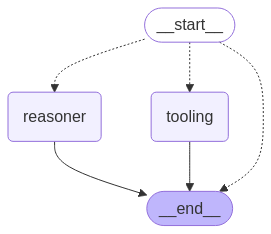

In [ ]:
final_graph = workflow.compile()
final_graph

In [ ]:
import json


# To test the code run this
query = {
    "search_heading": "",
    "search_content": "",
    "user_wants_heading": "",
    "user_wants_search_content": "",
    "llm_interactive_output": "",
    "final_check":""
    }
initial_state = {
        "messages":[],
        "query":query,
        "user_input":"",
        "rules_generated":""
    }

while True:
    user_input = input("You: ")  # Take dynamic input from user
    initial_state["user_input"] = str(user_input)

    response = final_graph.invoke(initial_state)
    print("Response isss " + str(response))


    if(response["rules_generated"] is not None and response["rules_generated"] != ""):
       regulations = response["messages"][-1][-1]
    else:
      initial_state["messages"] = initial_state["messages"] + [ str(response["messages"][0])]
      print("Messages are " + str(initial_state["messages"][-1]))
      initial_state["query"] = json.loads(response["messages"][-1].content)
      print("Content" + str( [response["messages"][-1].content]))
      print(response)
      requestObject = json.loads(response["messages"][0].content)
      if(requestObject["user_wants_search_content"] != "" and requestObject["user_wants_heading"] != "" and requestObject["final_check"] == "Yes"):
          final_graph.invoke(initial_state)




In [ ]:
import gradio as gr
import json


# To test the code using UI use this
query = {
    "search_heading": "",
    "search_content": "",
    "user_wants_heading": "",
    "user_wants_search_content": "",
    "llm_interactive_output": "",
    "final_check": ""
}
initial_state = {
    "messages": [],
    "query": query,
    "user_input": "",
    "rules_generated": ""
}

def chatbot(user_input, chat_history):
    if chat_history is None:
        chat_history = []

    chat_history.append((user_input, None))  # User messages on right

    if user_input.lower() in ["quit", "exit", "q"]:
        chat_history.append((None, "Goodbye!"))
        return chat_history

    initial_state["user_input"] = user_input
    response = final_graph.invoke(initial_state)

    if(response["rules_generated"] is not None and response["rules_generated"] != ""):
        output = response["rules_generated"]
        chat_history.append((None, output))
    else:
        initial_state["messages"].append(str(response["messages"][0]))
        initial_state["query"] = json.loads(response["messages"][-1].content)

        requestObject = json.loads(response["messages"][0].content)
        if (requestObject["user_wants_search_content"] != ""
                and requestObject["user_wants_heading"] != ""
                and requestObject["final_check"] == "Yes"):
            response = final_graph.invoke(initial_state)
            output = response["messages"][-1][-1]
        else:
            output = initial_state["query"]["llm_interactive_output"]

        chat_history.append((None, output))  # AI messages on left

    return chat_history

# Gradio UI with Custom Styles
with gr.Blocks(css="""
    .gradio-chatbot .message.user {text-align: right; background-color: #dcf8c6; border-radius: 10px; padding: 8px 12px;}
    .gradio-chatbot .message.bot {text-align: left; background-color: #f1f1f1; border-radius: 10px; padding: 8px 12px;}
""") as demo:
    gr.Markdown("## 🤖 Financial AI Assistant")

    chatbot_ui = gr.Chatbot()
    user_input = gr.Textbox(label="Enter your query", placeholder="Type a question...")
    send_button = gr.Button("Send")

    state = gr.State([])

    send_button.click(chatbot, inputs=[user_input, state], outputs=[chatbot_ui])

demo.launch(debug=True)


<ipython-input-30-1701f5156ec0>:61: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  chatbot_ui = gr.Chatbot()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://84fb920b52a9d0741d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


I am here search_heading='' search_content='' user_wants_heading='' user_wants_search_content='' llm_interactive_output='' final_check=''
I am here 1search_heading='' search_content='' user_wants_heading='' user_wants_search_content='' llm_interactive_output='' final_check=''
Previous messages[]
Before before{
"search_heading": "",
"search_content": "",
"user_wants_heading": "",
"user_wants_search_content": "",
"llm_interactive_output": "Sure, are you looking for documents related to complex finance or policies?",
"final_check":""
}
I am here search_heading='' search_content='' user_wants_heading='' user_wants_search_content='' llm_interactive_output='Sure, are you looking for documents related to complex finance or policies?' final_check=''
I am here 1search_heading='' search_content='' user_wants_heading='' user_wants_search_content='' llm_interactive_output='Sure, are you looking for documents related to complex finance or policies?' final_check=''
Previous messages['content=\'{\\n"